# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
#1
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


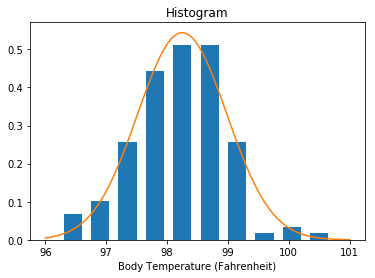

In [5]:
# Draw a histogram of body temperature and a normal distribution
plt.hist(df.temperature, width=0.3, normed=True)
plt.xlabel('Body Temperature (Fahrenheit)')
plt.title('Histogram')
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)

In [6]:
# Conduct a test of normality
# The null hypothesis is that the sample comes from a normal distribution

nt = stats.mstats.normaltest(df['temperature']) 
print('The z-statstic of the normality test is {:1.3f} with a p-value of {:1.3f}.'.format(nt[0],nt[1]))

The z-statstic of the normality test is 2.704 with a p-value of 0.259.


Text(0.5,1,'Normality Quantitle Plot')

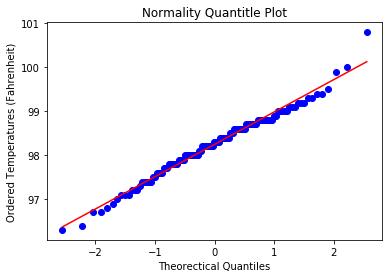

In [7]:
# Draw a normality quantile plot
import pylab

stats.probplot(df.temperature, dist='norm', plot=pylab)
plt.xlabel('Theorectical Quantiles')
plt.ylabel('Ordered Temperatures (Fahrenheit)')
plt.title('Normality Quantitle Plot')

#2

The sample size is large (n = 130), as it is greater than 30. Assuming the observations are independent, we can invoke the central limit theorem and say that the sample mean will be approximately a normal distribution.

In [8]:
#3
# Use one-sample test with the null hypothesis that true population mean is 98.6
n = len(df.temperature)
se = temp_std/np.sqrt(n)

z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_stat, p_val))

The z-statistic is -5.455 and the p-value is 0.00000005


In [9]:
#4
# Construct a 95% confidence interval for the sample mean
crit = stats.t.isf([0.025,0.005], n-1)
conf_int_95 = [temp_mean - crit[0]*se, temp_mean + crit[0]*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))

95% confidence interval: (98.12, 98.38)


In [10]:
# Construct a 99% confidence interval for the sample mean
conf_int_99 = [temp_mean - crit[1]*se, temp_mean + crit[1]*se]
print("99% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_99[0],conf_int_99[1]))

99% confidence interval: (98.08, 98.42)


We can say that 95% of the time the true average temperature will fall between 98.12 and 98.38. In a wider confidence interval, there is 99% chance that the true mean temperature will be between 98.08 and 98.42.

#5

We can use the two-sample test of the difference in means. The null hypothesis is that the average temperature for males and females are the same.

In [11]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19f299e8>,
      dtype=object)

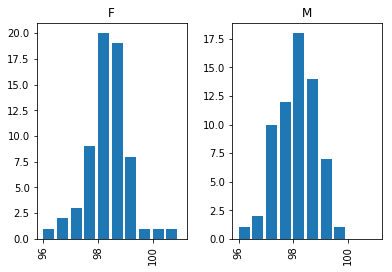

In [12]:
# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])

# Conclusion
Based on numbers we reject the null hypothesis in this case study. Women having higher body temperatures on average.
